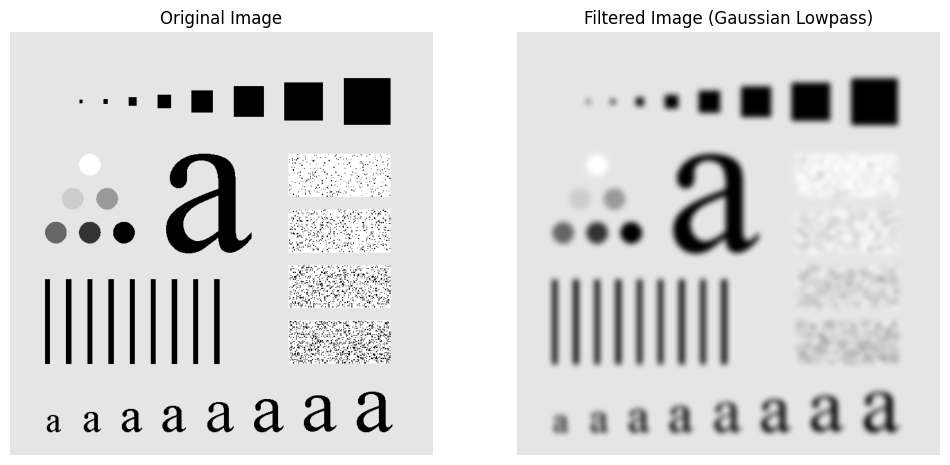

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, color

def gaussian_lowpass_filter(size, sigma):
    """Create a Gaussian lowpass filter."""
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    X, Y = np.meshgrid(x, y)
    filter_ = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return filter_ / np.sum(filter_)

def apply_filter(image, filter_):
    """Apply the filter to the image using convolution."""
    return convolve(image, filter_, mode='reflect')

# Load the image
image_path = 'Fig0441(a)(characters_test_pattern).png'  # Change this to your image path
image = io.imread(image_path)

# Convert RGBA to RGB, if necessary
if image.shape[2] == 4:  # Check if the image has an alpha channel
    image = image[:, :, :3]  # Discard the alpha channel

# Convert to grayscale
image = color.rgb2gray(image)

# Create Gaussian lowpass filter
filter_size = 21  # Size of the filter (must be odd)
sigma = 5  # Standard deviation
g_filter = gaussian_lowpass_filter(filter_size, sigma)

# Apply the filter to the image
filtered_image = apply_filter(image, g_filter)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Gaussian Lowpass)')
plt.axis('off')

plt.show()

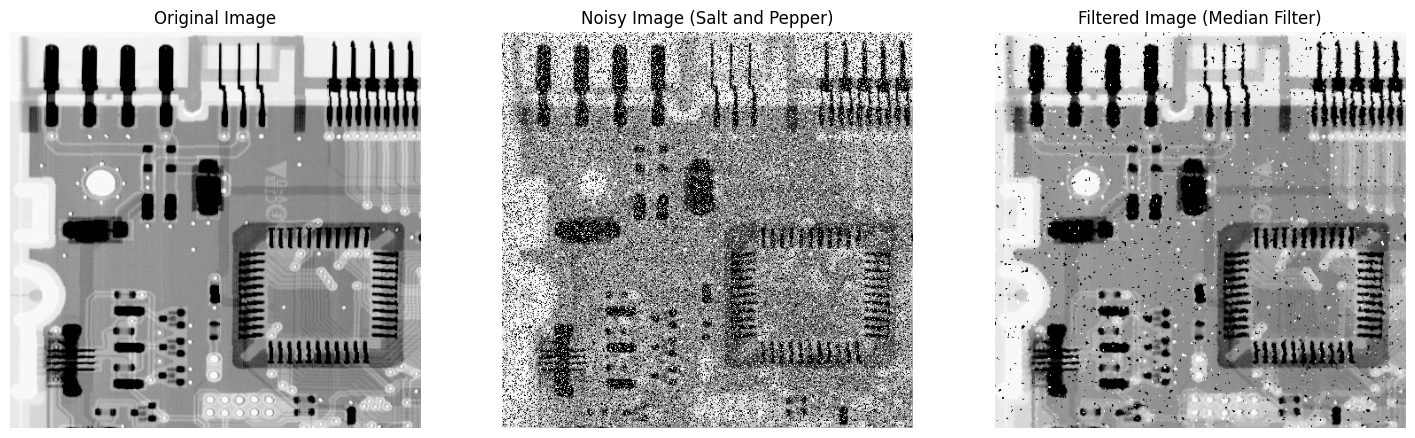

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, median_filter
from skimage import io, color

def gaussian_lowpass_filter(size, sigma):
    """Create a Gaussian lowpass filter."""
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    X, Y = np.meshgrid(x, y)
    filter_ = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return filter_ / np.sum(filter_)

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    """Add salt-and-pepper noise to an image."""
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = np.ceil(salt_prob * total_pixels)
    num_pepper = np.ceil(pepper_prob * total_pixels)

    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1  # Set salt pixels to white

    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0  # Set pepper pixels to black

    return noisy_image

# Load the image
image_path = 'Fig0507(a)(ckt-board-orig).png'  # Change this to your image path
image = io.imread(image_path)

# Convert RGBA to RGB, if necessary
if image.shape[2] == 4:  # Check if the image has an alpha channel
    image = image[:, :, :3]  # Discard the alpha channel

# Convert to grayscale
image = color.rgb2gray(image)

# Add salt-and-pepper noise
salt_prob = 0.2  # Probability of salt noise
pepper_prob = 0.2  # Probability of pepper noise
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

# Create Gaussian lowpass filter
filter_size = 21  # Size of the filter (must be odd)
sigma = 5  # Standard deviation
g_filter = gaussian_lowpass_filter(filter_size, sigma)

# Apply the Gaussian filter to the noisy image
filtered_gaussian = convolve(noisy_image, g_filter, mode='reflect')

# Apply median filtering to the noisy image
filtered_median = median_filter(noisy_image, size=3)  # Use a 3x3 median filter

# Display the original, noisy, and filtered images
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt and Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_median, cmap='gray')
plt.title('Filtered Image (Median Filter)')
plt.axis('off')

plt.show()